# Haberman's Survival Data Set
Survival of patients who had undergone surgery for breast cancer

Relevant Information: 
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

1. Number of Instances: 306

2. Number of Attributes: 4 (including the class attribute)

Attribute Information:
 Age of patient at time of operation (numerical)
 Patient's year of operation (year - 1900, numerical)
 Number of positive axillary nodes detected (numerical)
 Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
 Missing Attribute Values: None

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
heberman = pd.read_csv("haberman.csv",names=['age','year','#nodes','Class'])

In [3]:
#Number of data points and features in the data set
heberman.shape

(306, 4)

Observations:
1. The data set is too small

In [4]:
#Cloumn names
print (heberman.columns)

Index(['age', 'year', '#nodes', 'Class'], dtype='object')


In [5]:
#number of data points for each class
heberman['Class'].value_counts()

1    225
2     81
Name: Class, dtype: int64

Observations:
1. The data set is imbalance

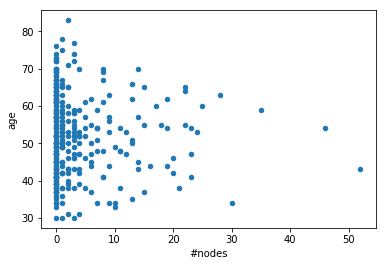

In [55]:
#2-D scatter plot
heberman.plot(kind='scatter', x='#nodes', y='age') ;
plt.show()

#observations:
1. Most of the positive axillary nodes(#nodes) lies at 0.
2. Age is morethan 30. So we can say that breast cancer is attacking after 30 

## Objective
The patient will survive more than five years or not after undergone surgery for breast cancer. It is Binary classification problem.

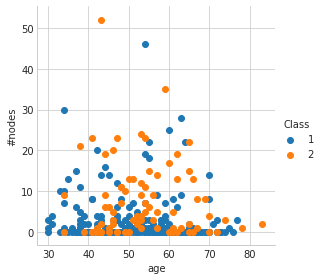

In [58]:
# 2-D Scatter plot with color-coding for each type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(heberman, hue="Class", size=4) \
   .map(plt.scatter, "age", "#nodes") \
   .add_legend();
plt.show();

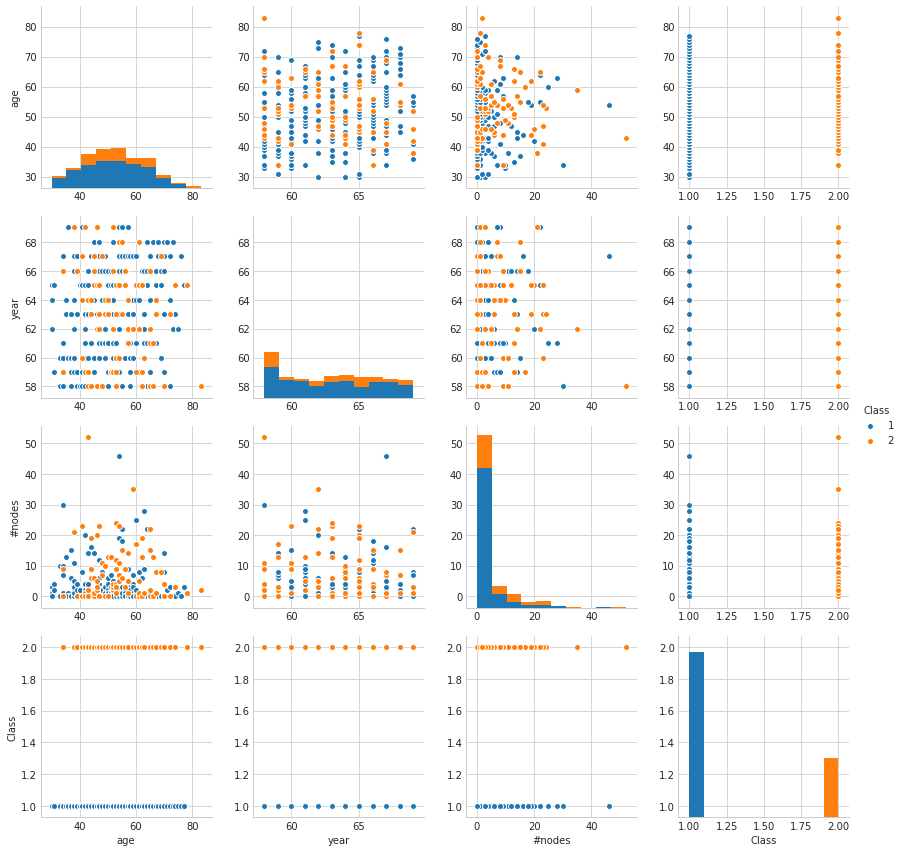

In [90]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid"); 
sns.pairplot(heberman, hue="Class", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

Obsevations:
#If the patient's age is below 40 then 90% of the times belongs to class-1


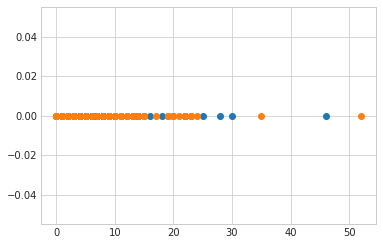

,age,year,#nodes,Class
7,34,59,0,2
8,34,66,9,2
24,38,69,21,2
34,39,66,0,2
43,41,60,23,2


In [65]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
one = heberman.loc[heberman["Class"] == 1];
two = heberman.loc[heberman["Class"] == 2];
plt.plot(one["#nodes"], np.zeros_like(one['#nodes']), 'o')
plt.plot(two["#nodes"], np.zeros_like(two['#nodes']), 'o')
plt.show()
two.head()

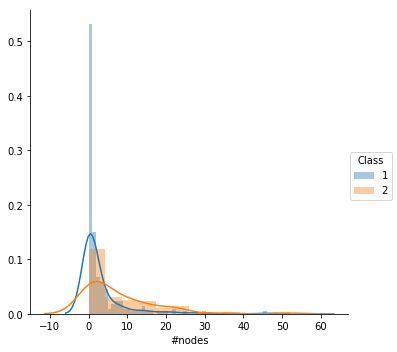

In [6]:
sns.FacetGrid(heberman, hue="Class", size=5) \
   .map(sns.distplot, "#nodes") \
   .add_legend();
plt.show();

Obsevations:
    The disribution of number of nodes righ skewd.
    Most of the node at 0-10


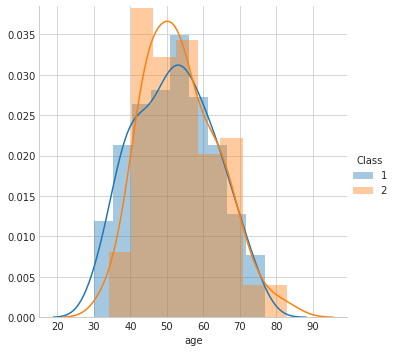

In [68]:
sns.FacetGrid(heberman, hue="Class", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

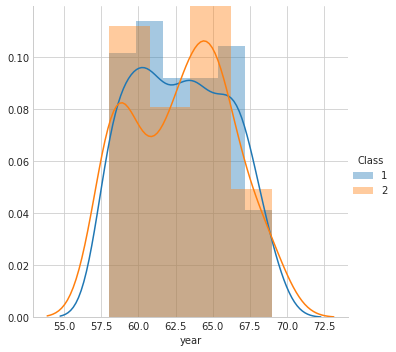

In [69]:
sns.FacetGrid(heberman, hue="Class", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

[ 0.05333333  0.10666667  0.12444444  0.09333333  0.16444444  0.16444444
  0.09333333  0.11111111  0.06222222  0.02666667]
[ 30.   34.7  39.4  44.1  48.8  53.5  58.2  62.9  67.6  72.3  77. ]


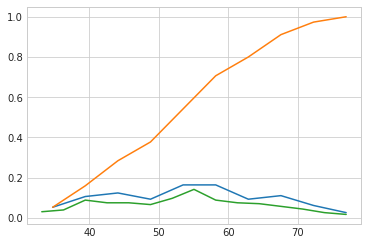

In [74]:

#CDF analysis

counts, bin_edges = np.histogram(one['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(one['age'], bins=15, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

[ 0.03703704  0.12345679  0.19753086  0.19753086  0.13580247  0.12345679
  0.09876543  0.04938272  0.02469136  0.01234568]
[ 34.   38.9  43.8  48.7  53.6  58.5  63.4  68.3  73.2  78.1  83. ]


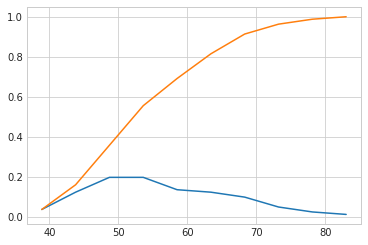

In [77]:
counts, bin_edges = np.histogram(two['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[ 0.05333333  0.10666667  0.12444444  0.09333333  0.16444444  0.16444444
  0.09333333  0.11111111  0.06222222  0.02666667]
[ 30.   34.7  39.4  44.1  48.8  53.5  58.2  62.9  67.6  72.3  77. ]
[ 0.03703704  0.12345679  0.19753086  0.19753086  0.13580247  0.12345679
  0.09876543  0.04938272  0.02469136  0.01234568]
[ 34.   38.9  43.8  48.7  53.6  58.5  63.4  68.3  73.2  78.1  83. ]


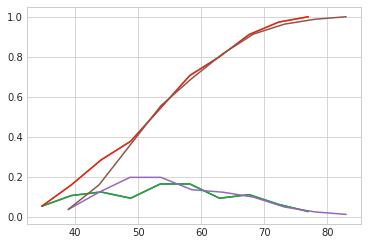

In [79]:
counts, bin_edges = np.histogram(one['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# class two
counts, bin_edges = np.histogram(two['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

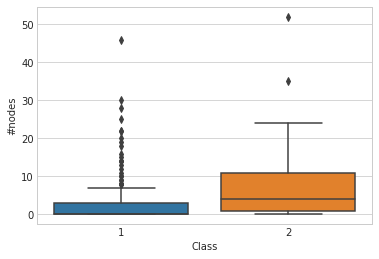

In [81]:
sns.boxplot(x='Class',y='#nodes', data=heberman)
plt.show()

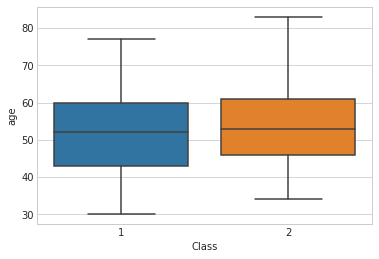

In [82]:
sns.boxplot(x='Class',y='age', data=heberman)
plt.show()

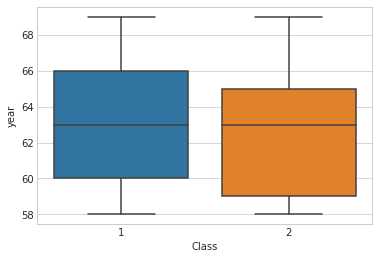

In [83]:
sns.boxplot(x='Class',y='year', data=heberman)
plt.show()

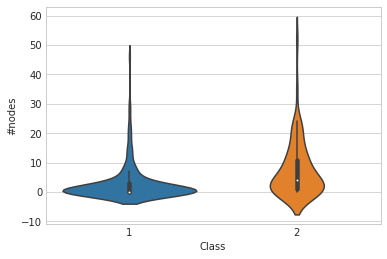

In [85]:
#violin plot
sns.violinplot(x="Class", y="#nodes", data=heberman, size=8)
plt.show()

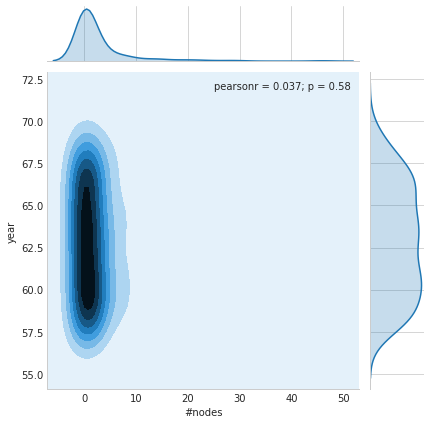

In [86]:
#2D Density plot, contors-plot
sns.jointplot(x="#nodes", y="year", data=one, kind="kde");
plt.show();

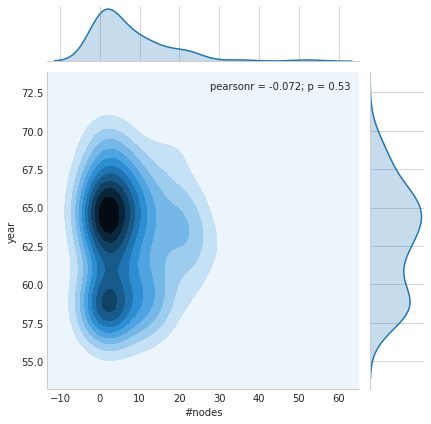

In [87]:
#2D Density plot, contors-plot
sns.jointplot(x="#nodes", y="year", data=two, kind="kde");
plt.show();

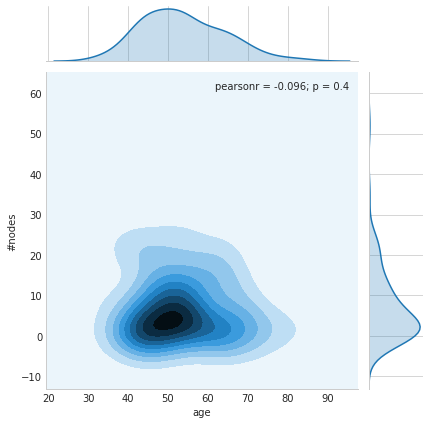

In [88]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="#nodes", data=two, kind="kde");
plt.show();